In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("email.csv")



In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download("stopwords")

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove whitespace
    text = " ".join([word for word in text.split() if word not in stopwords.words("english")])  # Remove stopwords like "the" and "and"
    return text

# Apply cleaning function
df["clean_text"] = df["Message"].apply(clean_text)

# Convert labels (spam = 1, ham = 0)
df["label"] = df["Category"].map({"spam": 1, "ham": 0})

# Display cleaned dataset
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\corma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message,clean_text,label
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0.0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,1.0
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,0.0


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


In [26]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Transform text into TF-IDF features
X = vectorizer.fit_transform(df['clean_text'])  

# Fill NaN values with 0 before converting to int
y = df['label'].fillna(0).astype(int)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
# Initialize and train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Save the trained model and vectorizer for later use
import joblib
joblib.dump(model, "spam_classifier.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


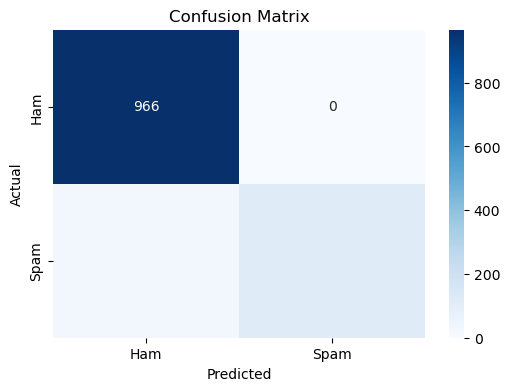

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

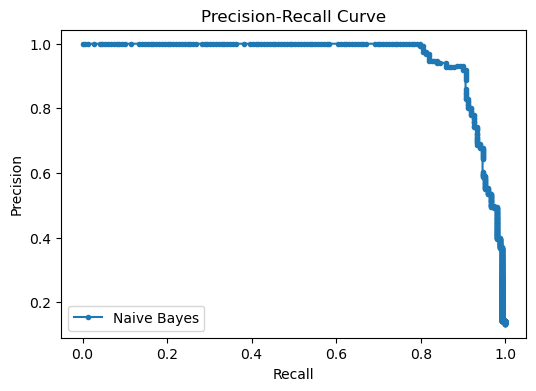

In [30]:
from sklearn.metrics import precision_recall_curve

# Get the probability scores for positive class
y_scores = model.predict_proba(X_test)[:,1]

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


label
0.0    4825
1.0     747
Name: count, dtype: int64


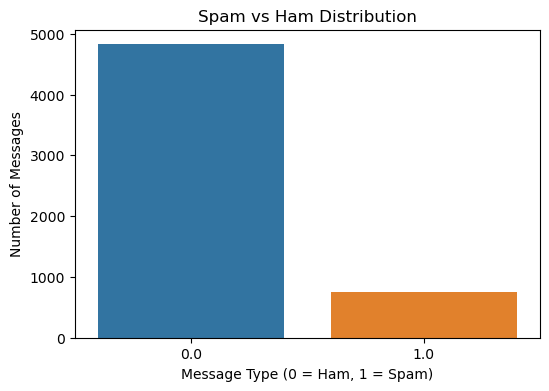

In [31]:
print(df['label'].value_counts())  # Count occurrences of spam (1) and ham (0)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'])
plt.xlabel("Message Type (0 = Ham, 1 = Spam)")
plt.ylabel("Number of Messages")
plt.title("Spam vs Ham Distribution")
plt.show()